In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('airline_tweets.csv')
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [18]:
sns.set()
sns.set_style("whitegrid", {"figure.facecolor": (1, 1, 1, 0), "legend.frameon": True})

# Airline Tweet Sentiment Analysis

The full version of the analysis is [here](https://sites.google.com/view/will-cromar/portfolio/airline-tweets).

I found this dataset on [Kaggle](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

[Text(0,0.5,'Number of Tweets'), Text(0.5,0,'Sentiment')]

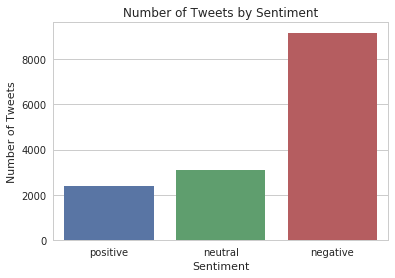

In [103]:
ax = sns.countplot(df['airline_sentiment'], order=['positive', 'neutral', 'negative'])
ax.set_title('Number of Tweets by Sentiment')
ax.set(xlabel='Sentiment', ylabel='Number of Tweets')

Concretely, let's look at a sampling of tweets.

In [88]:
for _, row in df.sample(10, random_state=42).iterrows():
    print("https://script.google.com/macros/s/AKfycbxsAlbPEwvxatd__Zml35ukLM0MUerhfCbmQL8g9XZrpf4UbKw/exec?tweetid={}".format(row['tweet_id']))
    print(row['airline_sentiment_confidence'])
    print(row['tweet_id'])
    print(row['airline'])
    print(row['airline_sentiment'])
    print(row['text'])
    print()

https://script.google.com/macros/s/AKfycbxsAlbPEwvxatd__Zml35ukLM0MUerhfCbmQL8g9XZrpf4UbKw/exec?tweetid=569731104070115329
1.0
569731104070115329
Southwest
positive
@SouthwestAir you're my early frontrunner for best airline! #oscars2016


https://script.google.com/macros/s/AKfycbxsAlbPEwvxatd__Zml35ukLM0MUerhfCbmQL8g9XZrpf4UbKw/exec?tweetid=569263373092823040
1.0
569263373092823040
US Airways
negative
@USAirways how is it that my flt to EWR was Cancelled Flightled yet flts to NYC from USAirways are still flying?


https://script.google.com/macros/s/AKfycbxsAlbPEwvxatd__Zml35ukLM0MUerhfCbmQL8g9XZrpf4UbKw/exec?tweetid=568818669024907264
1.0
568818669024907264
JetBlue
negative
@JetBlue what is going on with your BDL to DCA flights yesterday and today?! Why is every single one getting delayed?


https://script.google.com/macros/s/AKfycbxsAlbPEwvxatd__Zml35ukLM0MUerhfCbmQL8g9XZrpf4UbKw/exec?tweetid=567775864679456768
1.0
567775864679456768
JetBlue
neutral
@JetBlue do they have to depart fro

In [89]:
# Somehow, almost all of JetBlue's tweets are labelled as Delta
df.loc[df['airline'] == 'Delta', 'airline'] = 'JetBlue'

## Breaking Sentiment Down by Airline

[Text(0,0.5,'Number of Tweets'), Text(0.5,0,'Airline')]

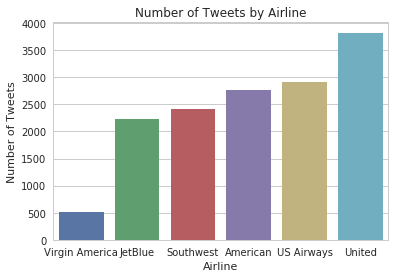

In [100]:
ax = sns.countplot(df['airline'],
                   order=reversed(['United', 'US Airways', 'American', 'Southwest', 'JetBlue', 'Virgin America']))
ax.set_title('Number of Tweets by Airline')
ax.set(xlabel='Airline', ylabel='Number of Tweets')

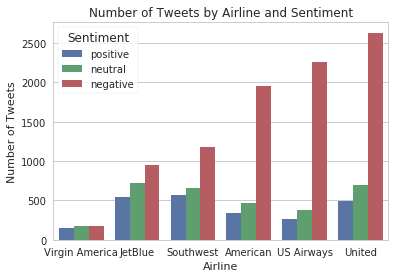

In [98]:
ax = sns.countplot(x='airline', hue='airline_sentiment', data=df,
                   order=reversed(['United', 'US Airways', 'American', 'Southwest', 'JetBlue', 'Virgin America']),
                   hue_order=['positive', 'neutral', 'negative'], )
ax.set(xlabel='Airline', ylabel='Number of Tweets')
ax.set_title('Number of Tweets by Airline and Sentiment')
ax.legend().set_title("Sentiment")



The relative scales of the airlines skews the tweets. That is, United is a larger airline than Virgin America by a lot and has more of each type of tweet.

In [92]:
print(df['airline'].unique())

['Virgin America' 'United' 'Southwest' 'JetBlue' 'US Airways' 'American']


Below, if we assign a point system to sentiment (with negative being -1 point, neutral being 0 points, and positive being 1 point), we can take the point average across all of the airlines. This gives us a measure how liked an airline is on average, without the scale of the airline skewing its representation.

In [93]:
sentiment_values = {
    'neutral': 0,
    'positive': 1,
    'negative': -1,
}
df['numeric_sentiment'] = df['airline_sentiment'].map(sentiment_values)

[Text(0,0.5,'Average Sentiment'), Text(0.5,0,'Airline')]

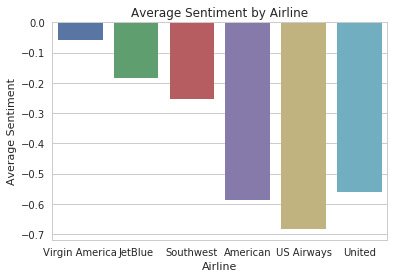

In [101]:
ax = sns.barplot(x='airline', y='numeric_sentiment', data=df,
                 ci=None,
                 order=reversed(['United', 'US Airways', 'American', 'Southwest', 'JetBlue', 'Virgin America']))
ax.set_title('Average Sentiment by Airline')
ax.set(xlabel='Airline', ylabel='Average Sentiment')

In [95]:
df['negativereason'].value_counts().index

Index(['Customer Service Issue', 'Late Flight', 'Can't Tell',
       'Cancelled Flight', 'Lost Luggage', 'Bad Flight',
       'Flight Booking Problems', 'Flight Attendant Complaints', 'longlines',
       'Damaged Luggage'],
      dtype='object')

Clearly, United, US Airways, and American airlines are the least favorite airlines of Twitter users. Let's look at what makes them so hated:

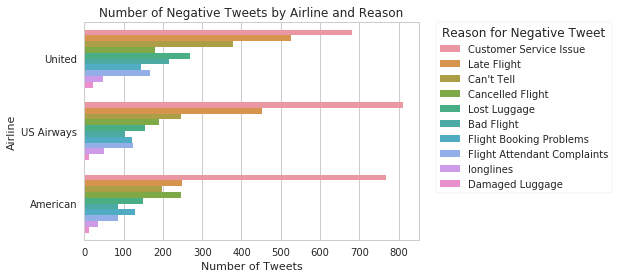

In [102]:
ax = sns.countplot(y='airline', hue='negativereason', data=df.query('airline == "United" or '
                                                                    'airline == "US Airways" or '
                                                                    'airline == "American"'),
                  hue_order=df['negativereason'].value_counts().index)
ax.set(xlabel='Number of Tweets', ylabel='Airline')
ax.set_title('Number of Negative Tweets by Airline and Reason')
ax.legend().set_title("Reason")

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Reason for Negative Tweet")

The most common issues to complain about seem to be Customer Service Issues and Late Flights.

What are the key differences between the way people talk about the worst airlines and people talk about the best airlines?

In [74]:
#HACK: put space between combined tweets
df['text'] += '\n'

In [75]:
all_tweets = df.groupby('airline')['text'].sum()

(-0.5, 399.5, 199.5, -0.5)

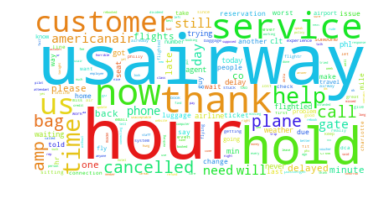

In [76]:
from wordcloud import WordCloud, STOPWORDS
united_stops = set(STOPWORDS)
united_stops.update(['flight'])
wc = WordCloud(background_color="white", mode='RGBA', random_state=42, max_words=2000, stopwords=united_stops) \
        .generate(all_tweets['US Airways'].lower())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

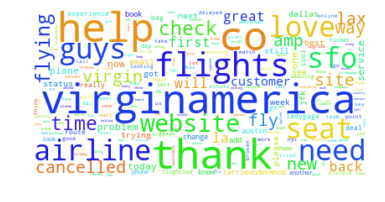

In [65]:
from wordcloud import WordCloud, STOPWORDS
united_stops = set(STOPWORDS)
united_stops.update(['flight'])
wc = WordCloud(background_color="white", mode='RGBA', random_state=42, max_words=2000, stopwords=united_stops) \
        .generate(all_tweets['Virgin America'].lower())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")